In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import requests

need to register to get an API key. Get one at https://api.eia.gov:443

In [2]:
with open('../data/EIA_API_key.txt') as f:
    api_key = f.readlines()
api_key = api_key[0]

This will return the "Demand for United States Lower 48 (region), hourly - local time". The api has changes since john ran this but this is the ~same time as the RFV replica data - 2021:Q2  

In [49]:
url = 'http://api.eia.gov/category/?api_key='+api_key+'&category_id=3389935' # old API url. New API url is below
url = 'https://api.eia.gov/v2/electricity/rto/region-data/data/?frequency=local-hourly&data[0]=value&facets[respondent][]=US48&facets[type][]=D&start=2021-04-01T00:00:00-06:00&end=2021-06-15T00:00:00-06:00&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000&api_key='+api_key
data = requests.get(url)
data_json = data.json()
df = pd.DataFrame(data_json['response']['data'])

In [58]:
df['Local time'] = pd.to_datetime(df['period'])
df.head()

,period,respondent,respondent-name,type,type-name,value,value-units,Local time
0,2021-06-14T20-04,US48,United States Lower 48,D,Demand,625499,megawatthours,2021-06-14 20:00:00-04:00
1,2021-06-14T19-04,US48,United States Lower 48,D,Demand,636092,megawatthours,2021-06-14 19:00:00-04:00
2,2021-06-14T18-04,US48,United States Lower 48,D,Demand,640117,megawatthours,2021-06-14 18:00:00-04:00
3,2021-06-14T17-04,US48,United States Lower 48,D,Demand,634923,megawatthours,2021-06-14 17:00:00-04:00
4,2021-06-14T16-04,US48,United States Lower 48,D,Demand,625304,megawatthours,2021-06-14 16:00:00-04:00


<AxesSubplot:>

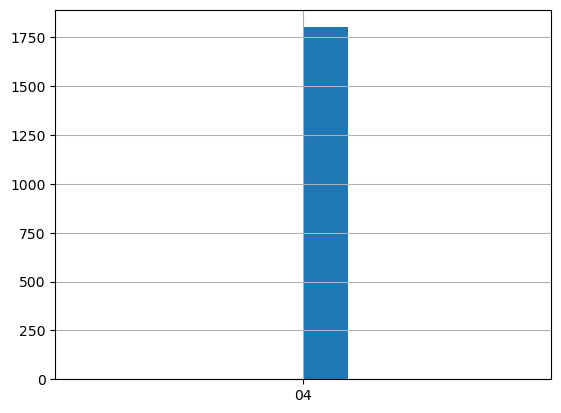

In [72]:
df.period.apply(lambda x: x[-2:]).hist()

In [75]:
df['Hour'] = df['Local time'].dt.hour

0       20
1       19
2       18
3       17
4       16
        ..
1796     0
1797    23
1798    22
1799    21
1800    20
Name: Hour, Length: 1801, dtype: int64

In [76]:
weekday_dict = {0:'monday',
               1:'tuesday',
               2:'wednesday',
               3:'thursday',
               4:'friday',
               5:'saturday',
               6:'sunday'}

In [77]:
df['Weekday'] = df['Local time'].dt.weekday.apply(lambda x: weekday_dict[x])

In [84]:
df_agg = df[['Weekday','Hour','value']].groupby(by=['Weekday','Hour']).mean().reset_index()
df_agg['D'] = df_agg['value']

In [85]:
df_agg

,Weekday,Hour,value,D
0,friday,0,430997.272727,430997.272727
1,friday,1,406921.545455,406921.545455
2,friday,2,387018.727273,387018.727273
3,friday,3,372592.090909,372592.090909
4,friday,4,363799.181818,363799.181818
...,...,...,...,...
163,wednesday,19,496234.200000,496234.200000
164,wednesday,20,486339.181818,486339.181818
165,wednesday,21,482991.181818,482991.181818
166,wednesday,22,475050.909091,475050.909091


In [86]:
import plotly.express as px
px.line(df_agg, x='Hour', y='D', color='Weekday')

In [87]:
df_agg.to_csv('../data/EIA_demand_summary.csv')